In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ufcdata/preprocessed_data.csv')
df.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


In [3]:
#Partitioning the dataset to X as predictors, and y as target
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(134), int64(24), object(1)
memory usage: 4.4+ MB


From the results above, we can see that there are two non-numeric features, winner and title_bout. The winner will be used as taget but the title bout will remain as a predictor and will be encoded with dummy variables.

In [5]:
#Encoding the title_bout feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])


#Encoding Y
labelencoder_y = LabelEncoder()
y[:] = labelencoder_y.fit_transform(y[:])


In [6]:
#Checking for proper dimensions of predictors, target and the encoding of title_bout
print("X Dimension: ",X.shape)
print()
print("y Dimension: ",y.shape)
print()
print("First row title bout value: 1 is True, 0 is False ==> ",X[0,0])
print("First row corner value: 1 is Red, 0 is Blue ==> ",y[3])
df.head()


X Dimension:  (3592, 159)

y Dimension:  (3592,)

First row title bout value: 1 is True, 0 is False ==>  1
First row corner value: 1 is Red, 0 is Blue ==>  0


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,1,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,0,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,0,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


From the results above, we can see that we have properly encoded the feature

In [7]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#keras for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [10]:
#ANN Model
classifier = Sequential()
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

#compiling the model
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
pred1 = classifier.fit(X_train, y_train,
              batch_size = 900,
              nb_epoch = 100)


Epoch 1/100
2873/2873 [==============================] - 0s 92us/step - loss: 0.6932 - accuracy: 0.5071
Epoch 2/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6874 - accuracy: 0.6700
Epoch 3/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6803 - accuracy: 0.6700
Epoch 4/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6687 - accuracy: 0.6700
Epoch 5/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6518 - accuracy: 0.6700
Epoch 6/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6298 - accuracy: 0.6700
Epoch 7/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6092 - accuracy: 0.6700
Epoch 8/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5957 - accuracy: 0.6700
Epoch 9/100
2873/2873 [==============================] - 0s 6us/step - loss: 0.5932 - accuracy: 0.6700
Epoch 10/100
2873/2873 [==============================] - 0s 6us/step -

2873/2873 [==============================] - 0s 4us/step - loss: 0.3063 - accuracy: 0.8886
Epoch 78/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2983 - accuracy: 0.8914
Epoch 79/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2926 - accuracy: 0.8949
Epoch 80/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2842 - accuracy: 0.8984
Epoch 81/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2784 - accuracy: 0.9015
Epoch 82/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2690 - accuracy: 0.9078
Epoch 83/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2639 - accuracy: 0.9092
Epoch 84/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2582 - accuracy: 0.9109
Epoch 85/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2544 - accuracy: 0.9109
Epoch 86/100
2873/2873 [==============================] - 0s 5us/step - loss:

In [12]:
pred1.history

{'loss': [0.6931802733534519,
  0.6874171415978594,
  0.68031387332421,
  0.6686502001528701,
  0.6517814411919498,
  0.6298097644041442,
  0.6091665799427729,
  0.5956606331329665,
  0.5932458427530773,
  0.5911762737829511,
  0.5850073469668533,
  0.5789013353325206,
  0.5747695316473367,
  0.5727957618431558,
  0.5702722401640534,
  0.5670500429424309,
  0.5639634553746318,
  0.5615724500902762,
  0.5591700885962245,
  0.5565579883155198,
  0.55410696667244,
  0.5514245136789109,
  0.5486420708336649,
  0.5459121220667023,
  0.5429685867977939,
  0.5405656725033376,
  0.5377437702421938,
  0.5346481492201542,
  0.5312615607077761,
  0.5284856522369584,
  0.525381481921345,
  0.5224407854662761,
  0.5186871549330478,
  0.5157047252475779,
  0.5132562753799855,
  0.5098710805955682,
  0.5063740262016784,
  0.5030747041484848,
  0.5006550906470458,
  0.49708422155401827,
  0.4950664578478302,
  0.4901748939523953,
  0.4887198922819183,
  0.48579470562760607,
  0.48183787196843497,
  0.

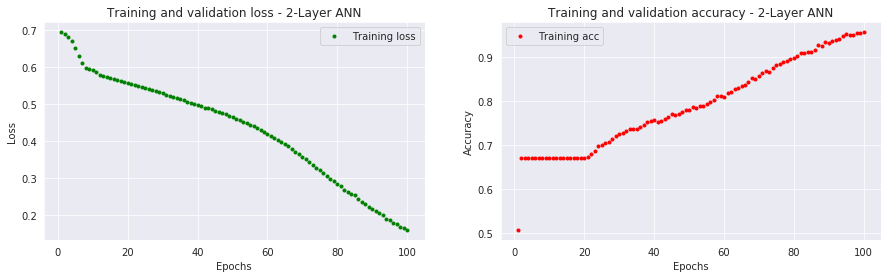

In [13]:
#Extracting CNN Results for Visualization
hist_ann = pred1.history
loss_values = hist_ann['loss']
acc_values = hist_ann['accuracy'] 


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')


plt.title('Training and validation loss - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.title('Training and validation accuracy - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.savefig('fight_pred1.png')
plt.show()

To ensure there is no bias or accident that the training results was really high, K-Fold will be utilize to ensure consistency of the model.

In [14]:
#K-Fold validation model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [15]:
#function to introduce model training in keras with sklearn k-fold
def build_predictor():
    #ANN Model
    predictor = Sequential()
    predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
    predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
    predictor.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

    #compiling the model
    predictor.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
    return predictor

In [16]:
classifier_sk = KerasClassifier(build_fn = build_predictor, batch_size = 900, epochs = 100)

In [17]:
accuracies = cross_val_score(estimator = classifier_sk,
                             X = X_train,
                             y = y_train,
                             cv = 10)

Epoch 1/100
2585/2585 [==============================] - 0s 43us/step - loss: 0.6916 - accuracy: 0.6074
Epoch 2/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6866 - accuracy: 0.6723
Epoch 3/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6804 - accuracy: 0.6723
Epoch 4/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6713 - accuracy: 0.6723
Epoch 5/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6590 - accuracy: 0.6723
Epoch 6/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6431 - accuracy: 0.6723
Epoch 7/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6255 - accuracy: 0.6723
Epoch 8/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6094 - accuracy: 0.6723
Epoch 9/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.5980 - accuracy: 0.6723
Epoch 10/100
2585/2585 [==============================] - 0s 4us/step - 

2585/2585 [==============================] - 0s 4us/step - loss: 0.2439 - accuracy: 0.9199
Epoch 80/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2349 - accuracy: 0.9219
Epoch 81/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2248 - accuracy: 0.9338
Epoch 82/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2158 - accuracy: 0.9373
Epoch 83/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2076 - accuracy: 0.9416
Epoch 84/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.1994 - accuracy: 0.9455
Epoch 85/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.1902 - accuracy: 0.9474
Epoch 86/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.1819 - accuracy: 0.9567
Epoch 87/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.1737 - accuracy: 0.9598
Epoch 88/100
2585/2585 [==============================] - 0s 5us/step - loss:

2585/2585 [==============================] - 0s 4us/step - loss: 0.3748 - accuracy: 0.8441
Epoch 58/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3681 - accuracy: 0.8487
Epoch 59/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3623 - accuracy: 0.8518
Epoch 60/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3559 - accuracy: 0.8515
Epoch 61/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3495 - accuracy: 0.8600
Epoch 62/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3435 - accuracy: 0.8615
Epoch 63/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3371 - accuracy: 0.8619
Epoch 64/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3306 - accuracy: 0.8681
Epoch 65/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3243 - accuracy: 0.8731
Epoch 66/100
2585/2585 [==============================] - 0s 4us/step - loss:

2585/2585 [==============================] - 0s 5us/step - loss: 0.5121 - accuracy: 0.7451
Epoch 36/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5087 - accuracy: 0.7485
Epoch 37/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.5054 - accuracy: 0.7516
Epoch 38/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.5021 - accuracy: 0.7520
Epoch 39/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.4989 - accuracy: 0.7544
Epoch 40/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4953 - accuracy: 0.7586
Epoch 41/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4920 - accuracy: 0.7613
Epoch 42/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.4887 - accuracy: 0.7632
Epoch 43/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.4851 - accuracy: 0.7617
Epoch 44/100
2585/2585 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 4us/step - loss: 0.5831 - accuracy: 0.6725
Epoch 14/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5784 - accuracy: 0.6725
Epoch 15/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5747 - accuracy: 0.6725
Epoch 16/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5719 - accuracy: 0.6725
Epoch 17/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5698 - accuracy: 0.6725
Epoch 18/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5674 - accuracy: 0.6725
Epoch 19/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5647 - accuracy: 0.6725
Epoch 20/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5621 - accuracy: 0.6725
Epoch 21/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5595 - accuracy: 0.6725
Epoch 22/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 4us/step - loss: 0.1480 - accuracy: 0.9706
Epoch 92/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1419 - accuracy: 0.9718
Epoch 93/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1344 - accuracy: 0.9756
Epoch 94/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1289 - accuracy: 0.9768
Epoch 95/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1228 - accuracy: 0.9799
Epoch 96/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1173 - accuracy: 0.9814
Epoch 97/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1116 - accuracy: 0.9830
Epoch 98/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1064 - accuracy: 0.9845
Epoch 99/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1015 - accuracy: 0.9845
Epoch 100/100
287/287 [==============================] - 0s 113us/step
Epoch 

2586/2586 [==============================] - 0s 4us/step - loss: 0.3282 - accuracy: 0.8828
Epoch 70/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3207 - accuracy: 0.8848
Epoch 71/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3122 - accuracy: 0.8886
Epoch 72/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3050 - accuracy: 0.8910
Epoch 73/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2965 - accuracy: 0.8956
Epoch 74/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2898 - accuracy: 0.9006
Epoch 75/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.2822 - accuracy: 0.9084
Epoch 76/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.2733 - accuracy: 0.9157
Epoch 77/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.2657 - accuracy: 0.9149
Epoch 78/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 4us/step - loss: 0.4686 - accuracy: 0.7757
Epoch 48/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4641 - accuracy: 0.7788
Epoch 49/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4599 - accuracy: 0.7819
Epoch 50/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4550 - accuracy: 0.7862
Epoch 51/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4504 - accuracy: 0.7889
Epoch 52/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4455 - accuracy: 0.7935
Epoch 53/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4403 - accuracy: 0.7989
Epoch 54/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4350 - accuracy: 0.8074
Epoch 55/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4295 - accuracy: 0.8136
Epoch 56/100
2586/2586 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 4us/step - loss: 0.5472 - accuracy: 0.6663
Epoch 26/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5449 - accuracy: 0.6705
Epoch 27/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5426 - accuracy: 0.6756
Epoch 28/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5401 - accuracy: 0.6825
Epoch 29/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5377 - accuracy: 0.6906
Epoch 30/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5351 - accuracy: 0.6972
Epoch 31/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5325 - accuracy: 0.7042
Epoch 32/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5298 - accuracy: 0.7111
Epoch 33/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5271 - accuracy: 0.7181
Epoch 34/100
2586/2586 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.6789 - accuracy: 0.6671
Epoch 4/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6687 - accuracy: 0.6671
Epoch 5/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6550 - accuracy: 0.6671
Epoch 6/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6384 - accuracy: 0.6671
Epoch 7/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6202 - accuracy: 0.6671
Epoch 8/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6056 - accuracy: 0.6671
Epoch 9/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5970 - accuracy: 0.6671
Epoch 10/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5942 - accuracy: 0.6671
Epoch 11/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5930 - accuracy: 0.6671
Epoch 12/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.589

Epoch 82/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2457 - accuracy: 0.9246
Epoch 83/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.2394 - accuracy: 0.9242
Epoch 84/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2301 - accuracy: 0.9319
Epoch 85/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2231 - accuracy: 0.9354
Epoch 86/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2160 - accuracy: 0.9385
Epoch 87/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2081 - accuracy: 0.9432
Epoch 88/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2011 - accuracy: 0.9451
Epoch 89/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1947 - accuracy: 0.9470
Epoch 90/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1878 - accuracy: 0.9501
Epoch 91/100
2586/2586 [==============================] - 0s 4us

2586/2586 [==============================] - 0s 5us/step - loss: 0.4063 - accuracy: 0.8198
Epoch 61/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4000 - accuracy: 0.8260
Epoch 62/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3944 - accuracy: 0.8271
Epoch 63/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3881 - accuracy: 0.8314
Epoch 64/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3818 - accuracy: 0.8384
Epoch 65/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3756 - accuracy: 0.8415
Epoch 66/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3688 - accuracy: 0.8469
Epoch 67/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3624 - accuracy: 0.8507
Epoch 68/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3568 - accuracy: 0.8527
Epoch 69/100
2586/2586 [==============================] - 0s 6us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.5016 - accuracy: 0.7486
Epoch 39/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4980 - accuracy: 0.7552
Epoch 40/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4948 - accuracy: 0.7583
Epoch 41/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4911 - accuracy: 0.7606
Epoch 42/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4872 - accuracy: 0.7626
Epoch 43/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4835 - accuracy: 0.7676
Epoch 44/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4797 - accuracy: 0.7738
Epoch 45/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4757 - accuracy: 0.7773
Epoch 46/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4724 - accuracy: 0.7769
Epoch 47/100
2586/2586 [==============================] - 0s 5us/step - loss:

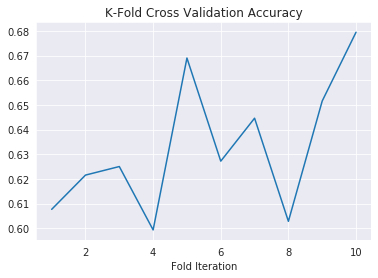

In [18]:
plt.plot(range(1,11),accuracies)
plt.xlabel('Fold Iteration')
plt.title("K-Fold Cross Validation Accuracy")
#plt.savefig("ann_k_fold.png")
plt.show()

In [19]:
accuracies

array([0.6076389 , 0.62152779, 0.625     , 0.59930313, 0.66898954,
       0.62717772, 0.64459932, 0.60278744, 0.65156794, 0.67944252])

In [20]:
#GridSearch validation model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
#function to introduce model training in keras with Gridsearch
def build_classifier(optimizer):
    #ANN Model
    classifier = Sequential()
    classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
    classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

    #compiling the model
    classifier.compile(optimizer = optimizer,
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
    return classifier

In [22]:
classifier_sk = KerasClassifier(build_fn = build_classifier)

In [28]:
#Parameters for GridSearch
params = {'batch_size':[25,32],
          'epochs': [100,500],
          'optimizer': ['adam','rmsprop']
         }

In [27]:
#GridSearch for ANN
grid_search = GridSearchCV(estimator=classifier_sk,
                          param_grid = params,
                          scoring='accuracy',
                          cv = 10)

In [29]:
#training for gridsearch
# grid = 
grid_search.fit(X_train,y_train)
# best_params = grid.best_params_
# best_accuracy = grid.best_score_

Epoch 1/100
2585/2585 [==============================] - 0s 162us/step - loss: 0.6248 - accuracy: 0.6638
Epoch 2/100
2585/2585 [==============================] - 0s 107us/step - loss: 0.5772 - accuracy: 0.6762
Epoch 3/100
2585/2585 [==============================] - 0s 110us/step - loss: 0.5574 - accuracy: 0.7025
Epoch 4/100
2585/2585 [==============================] - 0s 105us/step - loss: 0.5346 - accuracy: 0.7288
Epoch 5/100
2585/2585 [==============================] - 0s 107us/step - loss: 0.5198 - accuracy: 0.7505
Epoch 6/100
2585/2585 [==============================] - 0s 105us/step - loss: 0.5000 - accuracy: 0.7551
Epoch 7/100
2585/2585 [==============================] - 0s 107us/step - loss: 0.4801 - accuracy: 0.7752
Epoch 8/100
2585/2585 [==============================] - 0s 111us/step - loss: 0.4504 - accuracy: 0.7930
Epoch 9/100
2585/2585 [==============================] - 0s 115us/step - loss: 0.4313 - accuracy: 0.8031
Epoch 10/100
2585/2585 [==============================]

2585/2585 [==============================] - 0s 106us/step - loss: 1.6789e-04 - accuracy: 1.0000
Epoch 78/100
2585/2585 [==============================] - 0s 106us/step - loss: 1.5662e-04 - accuracy: 1.0000
Epoch 79/100
2585/2585 [==============================] - 0s 104us/step - loss: 1.4691e-04 - accuracy: 1.0000
Epoch 80/100
2585/2585 [==============================] - 0s 104us/step - loss: 1.3504e-04 - accuracy: 1.0000
Epoch 81/100
2585/2585 [==============================] - 0s 107us/step - loss: 1.2728e-04 - accuracy: 1.0000
Epoch 82/100
2585/2585 [==============================] - 0s 106us/step - loss: 1.1877e-04 - accuracy: 1.0000
Epoch 83/100
2585/2585 [==============================] - 0s 109us/step - loss: 1.1032e-04 - accuracy: 1.0000
Epoch 84/100
2585/2585 [==============================] - 0s 105us/step - loss: 1.0352e-04 - accuracy: 1.0000
Epoch 85/100
2585/2585 [==============================] - 0s 104us/step - loss: 9.7788e-05 - accuracy: 1.0000
Epoch 86/100
2585/2585 

ValueError: unknown is not supported

In [25]:
type(y_train)

numpy.ndarray